# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful **group-by** engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in C-Python or C.


In [54]:
import pandas as pd
import numpy as np

! pip show pandas # show information about the library, including version

Name: pandas
Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

## Series

Series are an extention to numpy 1D arrays. The new features are *axis labels* and the possibility to store *heterogeneous* elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [17]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10])) # every element of the series can be labeled !
print ("xs: \n", xs,'\n')
print ("xs indexes: \n",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values: \n", xs.values, '\n')
print("type(xs.values) = " , type(xs.values),'\n')
# To access a single element, two syntaxes are permitted:
print ("f-labeled value: ", xs['f'], ", ", xs.f, '\n')
# To access a subset of the series:
print (xs[['d', 'f', 'h']], '\n')
# the subset is still a pandas series
print (type(xs[['d', 'f', 'h']]), '\n')

xs: 
 a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: 
 Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: 
 [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] 

type(xs.values) =  <class 'numpy.ndarray'> 

f-labeled value:  2.5 ,  2.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [ ]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

In [18]:
# Series can be created from python dictionary too (expectedly: they are so similiar!).
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [14]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1] #the first and last indexes are not common among the two series, and corresponding operations are simply ignored
print(s) #NaN value is printed where the operation could not be performed

a   -0.114197
b    1.785389
c   -2.667692
d   -0.278673
e    1.642445
dtype: float64
a         NaN
b    3.570778
c   -5.335383
d   -0.557346
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [21]:
# to define a date, the datetime module is very useful
import datetime as dt

# There are various syntaxes admitted for defining dates:

date_A = dt.date.today()
date_B = dt.datetime(2024,11,27,10,45,10,15)
date_C = 'Nov 27 2024'
date_D = '27/11/2024 10:45:00'

print("dt.date.today(): ", date_A)
print("dt.datetime(2024,11,27,10,45,10,15): ", date_B)

print("'Nov 27 2024': ", date_C) # these are just strings
print("'27/11/2024 10:45:00': ", date_D)

# Create a time series containing dates
days = pd.date_range(date_D, periods=7, freq='D')
print ("days series: ", days)

# Create a time series containing dates
seconds = pd.date_range(date_D, periods=3600, freq='s')
print ("seconds series: ", seconds)


dt.date.today():  2024-11-27
dt.datetime(2024,11,27,10,45,10,15):  2024-11-27 10:45:10.000015
'Nov 27 2024':  Nov 27 2024
'27/11/2024 10:45:00':  27/11/2024 10:45:00
days series:  DatetimeIndex(['2024-11-27 10:45:00', '2024-11-28 10:45:00',
               '2024-11-29 10:45:00', '2024-11-30 10:45:00',
               '2024-12-01 10:45:00', '2024-12-02 10:45:00',
               '2024-12-03 10:45:00'],
              dtype='datetime64[ns]', freq='D')
seconds series:  DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 10:45:01',
               '2024-11-27 10:45:02', '2024-11-27 10:45:03',
               '2024-11-27 10:45:04', '2024-11-27 10:45:05',
               '2024-11-27 10:45:06', '2024-11-27 10:45:07',
               '2024-11-27 10:45:08', '2024-11-27 10:45:09',
               ...
               '2024-11-27 11:44:50', '2024-11-27 11:44:51',
               '2024-11-27 11:44:52', '2024-11-27 11:44:53',
               '2024-11-27 11:44:54', '2024-11-27 11:44:55',
               '2024-11-27

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

### Timestamps

Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [ ]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



A standard series can be created and (range of) elements can be used as indexes

In [ ]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2024-11-27':'2024-12-03'], '\n') # Note - includes end time


`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [ ]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

## DataFrame

Basic informations:

- A pandas DataFrame is like a simple tabular spreadsheet. 

- For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

- Each column in a DataFrame is a Series object.

- The element can be whatever, missing data are dealt with as NaN.

### DataFrame creation

A DataFrame can be created implicitly, i.e. by providing the index (row names) and the values stored in a `numpy nd.array`.

In the following example, the index is a DatatimeIndex object.

In [22]:
entries=10
dates=pd.date_range('11/27/2024 10:45:00',freq='h', periods=entries) # 10 rows == 10 measures
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D']) # four variables (e.g. pressure, volume, temperature, humidity)
df


,A,B,C,D
2024-11-27 10:45:00,-0.464981,-0.714608,1.039424,-0.806507
2024-11-27 11:45:00,-1.769178,0.380838,-0.279008,-0.641365
2024-11-27 12:45:00,0.348361,0.208374,-0.503578,-1.706411
2024-11-27 13:45:00,-0.467313,0.321762,0.855027,-0.234357
2024-11-27 14:45:00,0.123160,-1.204769,2.099445,-0.265960
2024-11-27 15:45:00,-0.330046,-0.324374,1.275094,-1.308550
2024-11-27 16:45:00,0.138386,-0.524972,-1.039995,0.147370
2024-11-27 17:45:00,0.663835,0.026001,1.490875,0.402071
2024-11-27 18:45:00,-0.464545,-0.252956,0.384504,0.816329
2024-11-27 19:45:00,-0.022338,1.243782,0.818534,0.536484


or by means of a dictionary:

careful: all arrays must have the same length

In [28]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      #'D' : np.arange(7,10),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
print(df2)

# check what happens if D and E had different lenghts
# Answer:
# ValueError: All arrays must be of the same length

     A          B    C   D      E
0  1.0 2013-01-02  1.0   7   test
1  1.0 2013-01-02  1.0   8  train
2  1.0 2013-01-02  1.0   9   test
3  1.0 2013-01-02  1.0  10  train


### Viewing Data

In [ ]:
df.head(2)

In [ ]:
df.tail(4)

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.values

In [ ]:
df.describe() # THIS IS VERY NICE !!!!!

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.224466,-0.084092,0.614032,-0.306090
std,0.665191,0.681166,0.973438,0.817332
min,-1.769178,-1.204769,-1.039995,-1.706411
25%,-0.464872,-0.474823,-0.113130,-0.765221
50%,-0.176192,-0.113478,0.836780,-0.250159
75%,0.134580,0.293415,1.216177,0.338395
max,0.663835,1.243782,2.099445,0.816329


Pay attention: doing the transpose is very inefficient in real world datasets, because most of the times you have a lot more rows (measures, or data points) than values. So, handle with care.

In [ ]:
df.T

In [31]:
df.sort_index(axis=0,ascending=True) # from the smallest to the biggest
df.sort_index(axis=0,ascending=False) # from the biggest to the smallest

,A,B,C,D
2024-11-27 19:45:00,-0.022338,1.243782,0.818534,0.536484
2024-11-27 18:45:00,-0.464545,-0.252956,0.384504,0.816329
2024-11-27 17:45:00,0.663835,0.026001,1.490875,0.402071
2024-11-27 16:45:00,0.138386,-0.524972,-1.039995,0.147370
2024-11-27 15:45:00,-0.330046,-0.324374,1.275094,-1.308550
2024-11-27 14:45:00,0.123160,-1.204769,2.099445,-0.265960
2024-11-27 13:45:00,-0.467313,0.321762,0.855027,-0.234357
2024-11-27 12:45:00,0.348361,0.208374,-0.503578,-1.706411
2024-11-27 11:45:00,-1.769178,0.380838,-0.279008,-0.641365
2024-11-27 10:45:00,-0.464981,-0.714608,1.039424,-0.806507


In [34]:
df.sort_values(by="C") # re-arrange the rows, but this time basing on the values in column C. Default is ascending =True
df.sort_values(by="C", ascending= False)

,A,B,C,D
2024-11-27 14:45:00,0.123160,-1.204769,2.099445,-0.265960
2024-11-27 17:45:00,0.663835,0.026001,1.490875,0.402071
2024-11-27 15:45:00,-0.330046,-0.324374,1.275094,-1.308550
2024-11-27 10:45:00,-0.464981,-0.714608,1.039424,-0.806507
2024-11-27 13:45:00,-0.467313,0.321762,0.855027,-0.234357
2024-11-27 19:45:00,-0.022338,1.243782,0.818534,0.536484
2024-11-27 18:45:00,-0.464545,-0.252956,0.384504,0.816329
2024-11-27 11:45:00,-1.769178,0.380838,-0.279008,-0.641365
2024-11-27 12:45:00,0.348361,0.208374,-0.503578,-1.706411
2024-11-27 16:45:00,0.138386,-0.524972,-1.039995,0.147370


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [37]:
# Selecting columns:

## standard and safe
some_column = df['A']
## equivalent but dangerous (imagine blank spaces in the name of the column..)
some_column = df.A

# Selecting rows:

## by counting
print (df[0:3], end= '\n\n')
## or by index
print (df["2024-11-27 10:45:00":"2024-11-27 12:45:00"])

                            A         B         C         D
2024-11-27 10:45:00 -0.464981 -0.714608  1.039424 -0.806507
2024-11-27 11:45:00 -1.769178  0.380838 -0.279008 -0.641365
2024-11-27 12:45:00  0.348361  0.208374 -0.503578 -1.706411

                            A         B         C         D
2024-11-27 10:45:00 -0.464981 -0.714608  1.039424 -0.806507
2024-11-27 11:45:00 -1.769178  0.380838 -0.279008 -0.641365
2024-11-27 12:45:00  0.348361  0.208374 -0.503578 -1.706411


### Selection by label

In [ ]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]] # select the row with specified index

A   -0.464981
B   -0.714608
C    1.039424
D   -0.806507
Name: 2024-11-27 10:45:00, dtype: float64

In [ ]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

In [ ]:
# showing label slicing, both endpoints are included:
df.loc['2024-11-27 14:45:00':'2024-11-27 16:45:00',['A','B']]

`.at` and `.loc` are equivalent methods

In [ ]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

### Selecting by position

In [ ]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

In [ ]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

In [ ]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])

# selecting an individual element by position
print(df.iloc[1,1])

### Boolean index

**Very powerful way of filtering out data with certain features**. Notation is very similar to numpy arrays.

In [43]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

# In this case, the rows not meeting the conditions are cutted out. The resulting dataframe is smaller.

,A,B,C,D
2024-11-27 11:45:00,-1.769178,0.380838,-0.279008,-0.641365
2024-11-27 12:45:00,0.348361,0.208374,-0.503578,-1.706411
2024-11-27 13:45:00,-0.467313,0.321762,0.855027,-0.234357
2024-11-27 17:45:00,0.663835,0.026001,1.490875,0.402071
2024-11-27 19:45:00,-0.022338,1.243782,0.818534,0.536484


In [46]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# In this other case, DataFrame with the same shape is returned, with NaN's where condition is not met.
# Typically you don't want this output, so you need again to filter out the rows with NaN

,A,B,C,D
2024-11-27 10:45:00,NaN,NaN,1.039424,NaN
2024-11-27 11:45:00,NaN,0.380838,NaN,NaN
2024-11-27 12:45:00,0.348361,0.208374,NaN,NaN
2024-11-27 13:45:00,NaN,0.321762,0.855027,NaN
2024-11-27 14:45:00,0.123160,NaN,2.099445,NaN
2024-11-27 15:45:00,NaN,NaN,1.275094,NaN
2024-11-27 16:45:00,0.138386,NaN,NaN,0.147370
2024-11-27 17:45:00,0.663835,0.026001,1.490875,0.402071
2024-11-27 18:45:00,NaN,NaN,0.384504,0.816329
2024-11-27 19:45:00,NaN,1.243782,0.818534,0.536484


### Setting

Combination of selection and setting of values

In [48]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# Defining a brand new column

# method 1
df['E'] = np.arange(len(df))*0.5
# method 2: by means of a pd.Series. CAREFUL: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

df

,A,B,C,D,E,E prime
2024-11-27 10:45:00,0.000000,-0.714608,1.039424,5.0,0.0,0
2024-11-27 11:45:00,-1.769178,0.380838,-0.279008,5.0,0.5,2
2024-11-27 12:45:00,0.348361,0.208374,-0.503578,5.0,1.0,4
2024-11-27 13:45:00,-0.467313,0.321762,0.855027,5.0,1.5,6
2024-11-27 14:45:00,0.123160,-1.204769,2.099445,5.0,2.0,8
2024-11-27 15:45:00,-0.330046,-0.324374,1.275094,5.0,2.5,10
2024-11-27 16:45:00,0.138386,-0.524972,-1.039995,5.0,3.0,12
2024-11-27 17:45:00,0.663835,0.026001,1.490875,5.0,3.5,14
2024-11-27 18:45:00,-0.464545,-0.252956,0.384504,5.0,4.0,16
2024-11-27 19:45:00,-0.022338,1.243782,0.818534,5.0,4.5,18


In [ ]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

In [ ]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

### Are you dealing with a Copy or a View?

In general is hard to tell. There is no real rule. See the following example to see how tricky it is:

Both actions are performed with the same method, `.loc`. Just calling the method in two slightly different ways produces a copy in one case and a view in the other!

In [51]:
dfd = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})
print (dfd, end= '\n\n')

# This is likely a view
subset = dfd.loc[0:1, 'a']  
subset[0] = 100  # May affect `df`

print (dfd, end= '\n\n')

# This is a copy
subset = dfd.loc[[0, 1], 'a']  
subset[0] = 200  # Does NOT affect `df`

print (dfd)

   a  b
0  1  4
1  2  5
2  3  6

     a  b
0  100  4
1    2  5
2    3  6

     a  b
0  100  4
1    2  5
2    3  6


The behaviour depend on the version of Pandas and on the version of Numpy that given version of Pandas depends upon. 

Since Pandas 1.5 "Copy-on-Write" (CoW) is (optionally) available and as of Pandas 3.0 will be the default. 

With CoW, **chained assignemt will never work**.

In the following example, the view `df["foo"]` and `df` itself are modified in one step. This will lead to a `ChainedAssignemntError`  

In [52]:
dfd["a"][dfd["b"] > 5] = 100
dfd

/var/folders/vk/kftm8379123bsmwrdp8l0xr00000gn/T/ipykernel_3337/449088826.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfd["a"][dfd["b"] > 5] = 100


,a,b
0,100,4
1,2,5
2,100,6


With Copy On Write, the chained operation can be substituted by using `loc`: 

In [ ]:
dfd.loc[dfd["b"] > 5, "a"] = 200
dfd

### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [ ]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

In [ ]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

In [ ]:
df

In [ ]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2024-11-27 18:45:00"))

## Missing data

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.

In [55]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime
2024-11-27 10:45:00,NaN,NaN,1.039424,5.0,NaN,NaN
2024-11-27 11:45:00,NaN,0.380838,NaN,5.0,0.5,2.0
2024-11-27 12:45:00,0.348361,0.208374,NaN,5.0,1.0,4.0
2024-11-27 13:45:00,NaN,0.321762,0.855027,5.0,1.5,6.0
2024-11-27 14:45:00,0.123160,NaN,2.099445,5.0,2.0,8.0
2024-11-27 15:45:00,NaN,NaN,1.275094,5.0,2.5,10.0
2024-11-27 16:45:00,0.138386,NaN,NaN,5.0,3.0,12.0
2024-11-27 17:45:00,0.663835,0.026001,1.490875,5.0,3.5,14.0
2024-11-27 18:45:00,NaN,NaN,0.384504,5.0,4.0,16.0
2024-11-27 19:45:00,NaN,1.243782,0.818534,5.0,4.5,18.0


In [56]:
# dropping rows with at least a Nan
df_wNan.dropna(how='any') # drop if any (at least one) of the elements is a NaN

,A,B,C,D,E,E prime
2024-11-27 17:45:00,0.663835,0.026001,1.490875,5.0,3.5,14.0


In [61]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime
2024-11-27 10:45:00,True,True,False,False,True,True
2024-11-27 11:45:00,True,False,True,False,False,False
2024-11-27 12:45:00,False,False,True,False,False,False
2024-11-27 13:45:00,True,False,False,False,False,False
2024-11-27 14:45:00,False,True,False,False,False,False
2024-11-27 15:45:00,True,True,False,False,False,False
2024-11-27 16:45:00,False,True,True,False,False,False
2024-11-27 17:45:00,False,False,False,False,False,False
2024-11-27 18:45:00,True,True,False,False,False,False
2024-11-27 19:45:00,True,False,False,False,False,False


In [ ]:
# filling missing data 
# 
# (use with care or not at all when dealing with real datasets)
# you might forget that you filled it and interpret the points as valid later on in the analysis
#
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime
2024-11-27 10:45:00,0.000000,0.000000,1.039424,5.0,0.0,0.0
2024-11-27 11:45:00,0.000000,0.380838,0.000000,5.0,0.5,2.0
2024-11-27 12:45:00,0.348361,0.208374,0.000000,5.0,1.0,4.0
2024-11-27 13:45:00,0.000000,0.321762,0.855027,5.0,1.5,6.0
2024-11-27 14:45:00,0.123160,0.000000,2.099445,5.0,2.0,8.0
2024-11-27 15:45:00,0.000000,0.000000,1.275094,5.0,2.5,10.0
2024-11-27 16:45:00,0.138386,0.000000,0.000000,5.0,3.0,12.0
2024-11-27 17:45:00,0.663835,0.026001,1.490875,5.0,3.5,14.0
2024-11-27 18:45:00,0.000000,0.000000,0.384504,5.0,4.0,16.0
2024-11-27 19:45:00,0.000000,1.243782,0.818534,5.0,4.5,18.0


In [65]:
df_wNan.fillna(method= 'pad')
# use this when you think that an interpolation of missing points is reasonable enough (data is very regular)

/var/folders/vk/kftm8379123bsmwrdp8l0xr00000gn/T/ipykernel_3337/2170565733.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_wNan.fillna(method= 'pad')


,A,B,C,D,E,E prime
2024-11-27 10:45:00,NaN,NaN,1.039424,5.0,NaN,NaN
2024-11-27 11:45:00,NaN,0.380838,1.039424,5.0,0.5,2.0
2024-11-27 12:45:00,0.348361,0.208374,1.039424,5.0,1.0,4.0
2024-11-27 13:45:00,0.348361,0.321762,0.855027,5.0,1.5,6.0
2024-11-27 14:45:00,0.123160,0.321762,2.099445,5.0,2.0,8.0
2024-11-27 15:45:00,0.123160,0.321762,1.275094,5.0,2.5,10.0
2024-11-27 16:45:00,0.138386,0.321762,1.275094,5.0,3.0,12.0
2024-11-27 17:45:00,0.663835,0.026001,1.490875,5.0,3.5,14.0
2024-11-27 18:45:00,0.663835,0.026001,0.384504,5.0,4.0,16.0
2024-11-27 19:45:00,0.663835,1.243782,0.818534,5.0,4.5,18.0


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast due to several intrinsic optimizations:

* They are implemented in C/Cython via NumPy.
* Pandas processes columns as contiguous memory arrays.
* Vectorized operations eliminate the need for slow Python loops.
* Efficient memory and cache utilization boost performance.


In [67]:
# Some statistics (mean() just as an example)
# rows
print (df.mean(axis=0),'\n\n')
# columns
print (df.mean(axis=1),'\n\n')

A         -0.177968
B         -0.084092
C          0.614032
D          5.000000
E          2.250000
E prime    9.000000
dtype: float64 


2024-11-27 10:45:00    0.887469
2024-11-27 11:45:00    0.972108
2024-11-27 12:45:00    1.675526
2024-11-27 13:45:00    2.201579
2024-11-27 14:45:00    2.669639
2024-11-27 15:45:00    3.020112
2024-11-27 16:45:00    3.095570
2024-11-27 17:45:00    4.113452
2024-11-27 18:45:00    4.111167
2024-11-27 19:45:00    4.923330
Freq: h, dtype: float64 




In [70]:
# global operations on columns

# column values are replaced with their cumulative value, summed from row zero to current row
df.apply(np.cumsum)

,A,B,C,D,E,E prime
2024-11-27 10:45:00,0.000000,-0.714608,1.039424,5.0,0.0,0
2024-11-27 11:45:00,-1.769178,-0.333771,0.760415,10.0,0.5,2
2024-11-27 12:45:00,-1.420817,-0.125397,0.256837,15.0,1.5,6
2024-11-27 13:45:00,-1.888130,0.196366,1.111864,20.0,3.0,12
2024-11-27 14:45:00,-1.764971,-1.008404,3.211309,25.0,5.0,20
2024-11-27 15:45:00,-2.095017,-1.332778,4.486403,30.0,7.5,30
2024-11-27 16:45:00,-1.956630,-1.857750,3.446408,35.0,10.5,42
2024-11-27 17:45:00,-1.292795,-1.831749,4.937282,40.0,14.0,56
2024-11-27 18:45:00,-1.757340,-2.084705,5.321787,45.0,18.0,72
2024-11-27 19:45:00,-1.779678,-0.840923,6.140320,50.0,22.5,90


In [71]:
df

,A,B,C,D,E,E prime
2024-11-27 10:45:00,0.000000,-0.714608,1.039424,5.0,0.0,0
2024-11-27 11:45:00,-1.769178,0.380838,-0.279008,5.0,0.5,2
2024-11-27 12:45:00,0.348361,0.208374,-0.503578,5.0,1.0,4
2024-11-27 13:45:00,-0.467313,0.321762,0.855027,5.0,1.5,6
2024-11-27 14:45:00,0.123160,-1.204769,2.099445,5.0,2.0,8
2024-11-27 15:45:00,-0.330046,-0.324374,1.275094,5.0,2.5,10
2024-11-27 16:45:00,0.138386,-0.524972,-1.039995,5.0,3.0,12
2024-11-27 17:45:00,0.663835,0.026001,1.490875,5.0,3.5,14
2024-11-27 18:45:00,-0.464545,-0.252956,0.384504,5.0,4.0,16
2024-11-27 19:45:00,-0.022338,1.243782,0.818534,5.0,4.5,18


In [72]:
df.apply(lambda x: x.max() - x.min())

A           2.433014
B           2.448552
C           3.139440
D           0.000000
E           4.500000
E prime    18.000000
dtype: float64

In [ ]:
# syntax is as usual similar to that of numpy arrays
df['A'] + df['B']

Let's play it hard and load (in memory) a (relatively) large dataset

In [ ]:
TODO 
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
!curl -O https://www.dropbox.com/scl/fi/pkkpoxlm7beasryexpdf8/data_000637.txt?rlkey=rkm2em1v57hewglzelmin21c9&e=1&st=v2mipkl4
#https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
file_name="data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

zsh:1: parse error near `&'


,"<a href=""https://www.dropbox.com/scl/fi/pkkpoxlm7beasryexpdf8/data_000637.txt?rlkey=rkm2em1v57hewglzelmin21c9"">Found</a>."


Let's now do some operations among (elements of) columns

In [ ]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
data['timens']

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

**Keep in mind**: For tasks on extremely large datasets, Pandas is **not** the best option anymore. Nowadays libraries like [Polars](https://docs.pola.rs) or [Dask](https://www.dask.org) can offer even faster alternatives by further parallelizing or optimizing columnar operations.

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [78]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.208229,0.277515,0.421068,-0.853007
1,-0.198942,0.279535,0.317665,0.252755
2,-0.606631,0.355541,0.667718,-1.105942
3,-0.328293,1.934024,0.411077,-0.206878
4,-0.432930,-0.438391,-0.514822,0.526117
5,0.028471,-1.644022,0.684910,-0.443443
6,-0.962949,-0.260390,1.303164,-1.168408
7,-0.634376,-0.669610,-0.095975,1.577698
8,-0.547591,-0.509914,0.587067,0.315817
9,-0.028378,-0.602655,-0.403147,0.804114


In [79]:
# divide it into pieces row-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.208229  0.277515  0.421068 -0.853007
 1 -0.198942  0.279535  0.317665  0.252755
 2 -0.606631  0.355541  0.667718 -1.105942,
           0         1         2         3
 3 -0.328293  1.934024  0.411077 -0.206878
 4 -0.432930 -0.438391 -0.514822  0.526117
 5  0.028471 -1.644022  0.684910 -0.443443
 6 -0.962949 -0.260390  1.303164 -1.168408,
           0         1         2         3
 7 -0.634376 -0.669610 -0.095975  1.577698
 8 -0.547591 -0.509914  0.587067  0.315817
 9 -0.028378 -0.602655 -0.403147  0.804114]

In [80]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.208229,0.277515,0.421068,-0.853007
1,-0.198942,0.279535,0.317665,0.252755
2,-0.606631,0.355541,0.667718,-1.105942
3,-0.328293,1.934024,0.411077,-0.206878
4,-0.432930,-0.438391,-0.514822,0.526117
5,0.028471,-1.644022,0.684910,-0.443443
6,-0.962949,-0.260390,1.303164,-1.168408
7,-0.634376,-0.669610,-0.095975,1.577698
8,-0.547591,-0.509914,0.587067,0.315817
9,-0.028378,-0.602655,-0.403147,0.804114


In [ ]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

Let's see the various merging options with the following two example dataframes

In [82]:
df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [2, 3, 4], 'age': [25, 30, 35]})

#### Merging, Inner Join (default)

Only rows with matching id values are included:

In [83]:
# Merge on the 'id' column
result = pd.merge(df1, df2, on='id')
print(result)

   id     name  age
0   2      Bob   25
1   3  Charlie   30


#### Merging, Left Join

A left join includes all rows from `df1` (left) and fills in `NaN` for missing matches in `df2`.

In [84]:
result = pd.merge(df1, df2, on='id', how='left')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0


#### Merging, Outer Join

An outer join includes all rows from both DataFrames, filling NaN for missing values

In [85]:
result = pd.merge(df1, df2, on='id', how='outer')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  35.0


`join` is similar to `merge` but uses index as key and has 'Left' as default

In [ ]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']}, index=[1, 2, 3])
df2 = pd.DataFrame({'age': [25, 30, 35]}, index=[2, 3, 4])

result = df1.join(df2)
print(result)


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


**Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis.** Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is **warmly recommended**. 

Let's go through a few examples:

In [2]:
import pandas as pd
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

# Group by 'Category' and calculate the sum
result = df.groupby('Category').sum()
print(result)


          Values
Category        
A             90
B             60
C             60


In [87]:
# Multiple Aggregations
result = df.groupby('Category').agg(['sum', 'mean'])
print(result)

         Values      
            sum  mean
Category             
A            90  30.0
B            60  30.0
C            60  60.0


In [88]:
# Grouping by multiple columns
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]})

result = df.groupby(['Category', 'Type']).sum()
print(result)


               Values
Category Type        
A        X         10
         Y         20
B        X         30
         Y         40
C        X         50
         Y         60


In [89]:
# Trasformations using groupby(): add group averages to DataFrame
df['Group_Avg'] = df.groupby('Category')['Values'].transform('mean')
print(df)

  Category Type  Values  Group_Avg
0        A    X      10       15.0
1        A    Y      20       15.0
2        B    X      30       35.0
3        B    Y      40       35.0
4        C    X      50       55.0
5        C    Y      60       55.0


In [91]:
# filtering
filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() > 50)
print(filtered)

  Category  Values
0        A      10
1        B      20
2        A      30
3        B      40
4        A      50
5        C      60


In [ ]:
# custom aggregation with apply()
def custom_aggregation(group):
    return pd.Series({
        'Sum': group['Values'].sum(),
        'Max': group['Values'].max(),
        'Count': group['Values'].count()
    })

result = df.groupby('Category').apply(custom_aggregation)
print(result)

In [ ]:
# splitting data into groups
grouped = df.groupby('Category')

for name, group in grouped:
    print(f"Group: {name}")
    print(group)


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [92]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.946261
       two       0.145200
baz    one       0.949948
       two       1.062019
foo    one      -1.184764
       two       0.244838
qux    one      -0.647094
       two       0.095144
dtype: float64


In [ ]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

In [ ]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

## Plotting

Just a preview, more on the next lab class!

<Axes: >

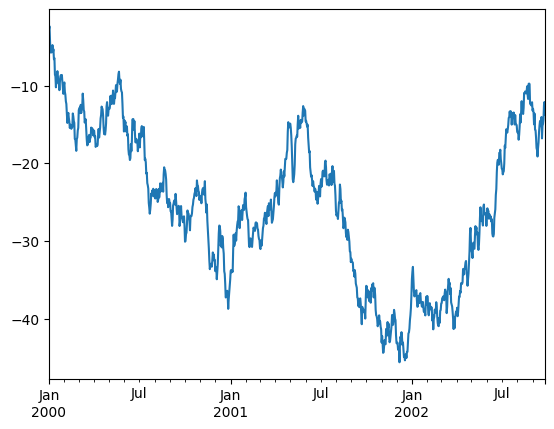

In [104]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

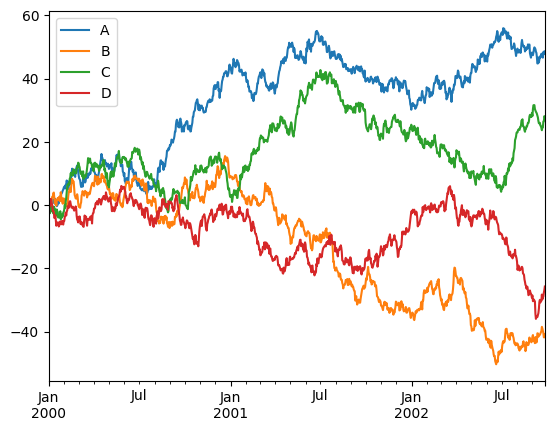

In [100]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')